<a href="https://colab.research.google.com/github/LaiTechTinker/Datascinceproject/blob/main/Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')
# Mount Google Drive (if not already mounted)

# Copy the entire dataset folder to /content (local Colab disk)
!cp -r "/content/drive/My Drive/Braintumor" /content/




Mounted at /content/drive


In [5]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [23]:
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader
# import pandas as pd
# train_transforms = transforms.Compose([
#     transforms.Resize((256, 256)),                    # Resize to a slightly larger size
#     transforms.RandomResizedCrop(224),                # Random crop to 224x224
#     transforms.RandomHorizontalFlip(p=0.5),           # Data augmentation: horizontal flip
#     transforms.RandomRotation(degrees=15),            # Randomly rotate ±15°
#     transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Optional: simulate real MRI variations
#     transforms.ToTensor(),                            # Convert to PyTorch Tensor
#     transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)    # Normalize to [-1, 1] range
# ])
# test_transforms = transforms.Compose([
#     transforms.Resize((256, 256)),         # same as training
#     transforms.CenterCrop(224),            # simulate random crop as center crop
#     transforms.ToTensor(),
#     transforms.Normalize([0.5]*3, [0.5]*3)
# ])
# # load the dataset
# train_dataset=ImageFolder("/content/drive/My Drive/Braintumor/Training", transform=train_transforms)
# test_dataset=ImageFolder('/content/drive/My Drive/Braintumor/Testing', transform=test_transforms)
# # iterate through each dataset
# train_loader=DataLoader(train_dataset,batch_size=24,num_workers=2, pin_memory=True,shuffle=True)

# test_loader=DataLoader(test_dataset,batch_size=100,shuffle=True)
# # check if cuda is available
# device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
# dataset=iter(train_loader)
# inputs,labels=next(dataset)

# # print(inputs.shape)
# # print(inputs.shape[1:])

# # for i in range(6):
# # #  plt.figure(figsize=(,6))
# #  plt.subplot(2,3,i+1)
# #  plt.axis('off')
# #  plt.imshow(inputs[i][0],cmap='gray')
# # plt.show()


In [31]:
# classes=["glioma", "meningioma", "no_tumor" "pituitary_tumor"]
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN,self).__init__()
#         self.conv1=nn.Conv2d(3,32,kernel_size=3,stride=1,padding=2)
#         self.conv2=nn.Conv2d(32,64,kernel_size=3,stride=2,padding=1)
#         self.maxpool=nn.MaxPool2d(kernel_size=2,stride=2,padding=0)
#         self.flatten=nn.Flatten()
#         self.fl1=nn.Linear(64*56*56,100)
#         self.fl2=nn.Linear(100,4)
#         self.relu=nn.ReLU()
#     def forward(self,x):
#         output=self.conv1(x)
#         output=self.conv2(output)
#         output=self.maxpool(output)
#         output=self.flatten(output)
#         output=self.fl1(output)
#         output=self.fl2(output)
#         output=self.relu(output)
#         return output




In [25]:
# model=CNN().to(device)
# criterion=nn.CrossEntropyLoss()
# optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
# num_epochs= 30
# n_steps=len(train_loader)
# for epoch in range(num_epochs):
#     for i,(images,labels) in enumerate(train_loader):
#         images=images.to(device,non_blocking=True)
#         labels=labels.to(device,non_blocking=True)
#         output=model.forward_pass(images)
#         loss=(criterion(output,labels))
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if (i+1)%5==0:
#             print(f'epoch:{epoch}, loss:[{loss.item():4f}], steps:[{i+1}/{n_steps}]')


In [28]:
# model = CNN().to(device)
# model.load_state_dict(torch.load('/content/drive/My Drive/Braintumor/cnn_model.pth'))
# model.eval()

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fl1): Linear(in_features=200704, out_features=100, bias=True)
  (fl2): Linear(in_features=100, out_features=4, bias=True)
  (relu): ReLU()
)

Accuracy: 52.86%


<Figure size 800x600 with 0 Axes>

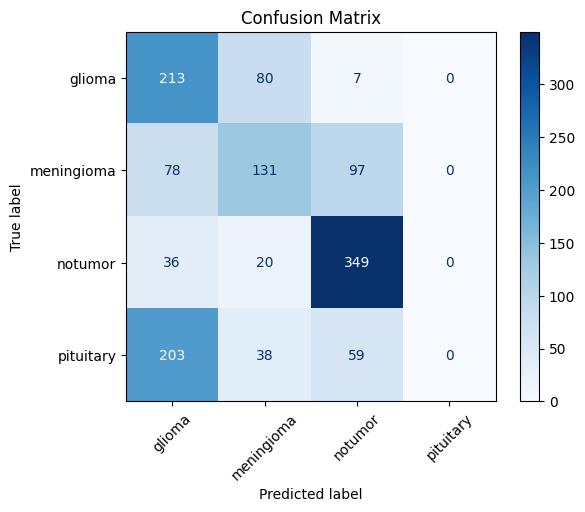

In [30]:
# # correct = 0
# # total = 0

# # with torch.no_grad():
# #     for images, labels in test_loader:
# #         images = images.to(device)
# #         labels = labels.to(device)
# #         outputs = model(images)
# #         _, predicted = torch.max(outputs, 1)
# #         total += labels.size(0)
# #         correct += (predicted == labels).sum().item()

# # print(f'Accuracy: {100 * correct / total:.2f}%')
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize containers to collect predictions and true labels
# all_preds = []
# all_labels = []
# correct=0
# total=0

# # Evaluation Loop
# model.eval()
# with torch.no_grad():
#     for images, labels in test_loader:
#         images = images.to(device)
#         labels = labels.to(device)

#         outputs = model(images)
#         _, predicted = torch.max(outputs, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#         all_preds.extend(predicted.cpu().numpy())
#         all_labels.extend(labels.cpu().numpy())
# print(f'Accuracy: {100 * correct / total:.2f}%')
# # Compute the confusion matrix
# cm = confusion_matrix(all_labels, all_preds)
# class_names = test_dataset.classes  # Get class names from dataset

# # Visualize the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# plt.figure(figsize=(8,6))
# disp.plot(cmap='Blues', xticks_rotation=45)
# plt.title("Confusion Matrix")
# plt.grid(False)
# plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 1.0647
Epoch 2/10, Loss: 0.7574
Epoch 3/10, Loss: 0.6677
Epoch 4/10, Loss: 0.6178
Epoch 5/10, Loss: 0.5985
Epoch 6/10, Loss: 0.5821
Epoch 7/10, Loss: 0.5710
Epoch 8/10, Loss: 0.5689
Epoch 9/10, Loss: 0.5443
Epoch 10/10, Loss: 0.5306
Accuracy: 80.78%


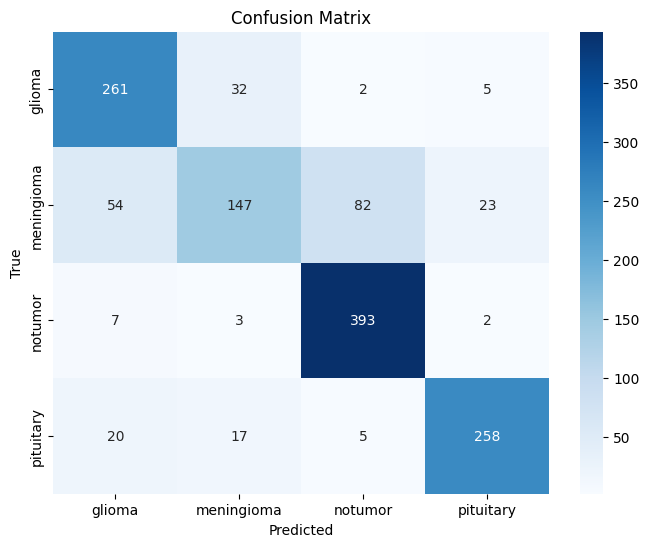

              precision    recall  f1-score   support

      glioma       0.76      0.87      0.81       300
  meningioma       0.74      0.48      0.58       306
     notumor       0.82      0.97      0.89       405
   pituitary       0.90      0.86      0.88       300

    accuracy                           0.81      1311
   macro avg       0.80      0.80      0.79      1311
weighted avg       0.80      0.81      0.80      1311



In [34]:
# ==== Mount Drive ====
from google.colab import drive
drive.mount('/content/drive')

# ==== Imports ====
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# ==== Device ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ==== Transforms ====
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# ==== Dataset and DataLoader ====
train_dir = '/content/drive/My Drive/Braintumor/Training'
test_dir = '/content/drive/My Drive/Braintumor/Testing'

train_dataset = ImageFolder(train_dir, transform=train_transforms)
test_dataset = ImageFolder(test_dir, transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# ==== Pretrained ResNet18 ====
model = torchvision.models.resnet18(pretrained=True)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace classifier
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 4)  # 4 classes in your brain tumor dataset
model = model.to(device)

# ==== Loss & Optimizer ====
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.0005)

# ==== Training Loop ====
epochs = 10
model.train()
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

# ==== Save Trained Model ====
torch.save(model.state_dict(), '/content/drive/My Drive/resnet_brain_tumor.pth')

# ==== Evaluation ====
model.eval()
all_preds = []
all_labels = []
total=0
correct=0

# with torch.no_grad():
#     for images, labels in test_loader:
#         images = images.to(device)
#         outputs = model(images)
#         _, preds = torch.max(outputs, 1)
#         all_preds.extend(preds.cpu().numpy())
#         all_labels.extend(labels.numpy())
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
print(f'Accuracy: {100 * correct / total:.2f}%')

# ==== Confusion Matrix ====
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ==== Classification Report ====
print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))
